<a href="https://colab.research.google.com/github/jjmora22/NLP/blob/Codigo_Notebooks/1_Descarga_Exploracion_Corpus_JJM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descarga y Exploración del Corpous

Necesito descargar el conjunto de datos de revisión de productos de Amazon desde http://jmcauley.ucsd.edu/data/amazon/. 

In [19]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [1]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/All_Amazon_Review_5.json.gz

--2023-03-12 08:13:22--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/All_Amazon_Review_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 25270692239 (24G) [application/x-gzip]
Saving to: ‘All_Amazon_Review_5.json.gz’

All_Amazon_Review_5 100%[===================>]  23.54G  57.0MB/s    in 7m 6s   

2023-03-12 08:20:28 (56.6 MB/s) - ‘All_Amazon_Review_5.json.gz’ saved [25270692239/25270692239]



Importo las librerías que requiero --> 

In [2]:
import pandas as pd # manipulación y análisis de datos
import numpy as np # operaciones matemáticas
import matplotlib.pyplot as plt # visualización de los datos
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


Expando los datos, genero el DataFrame y genero un subconjunto de los datos para evitar problemas de memoria. Voy a limitar el tamaño de la muestra, porque no cabe en el disco. --> 

In [3]:
#!gzip -d All_Amazon_Review_5.json.gz
!gzip -cd All_Amazon_Review_5.json.gz | head -15000 > subset.json

Genero un DataFrame en pandas --> 

In [4]:
df = pd.read_json('subset.json', lines=True)

In [5]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,2,False,"12 5, 2015",A3KUPJ396OQF78,B017O9P72A,Larry Russlin,Can only control one of two bulbs from one of ...,Buggy,1449273600,NaN,NaN
1,5,False,"01 15, 2018",A3TXR8GLKS19RE,B017O9P72A,Nello,Great skill,Great,1515974400,NaN,NaN
2,1,False,"01 4, 2018",A1FOHYK23FJ6CN,B017O9P72A,L. Ray Humphreys,Not happy. Can not connect to Alexa regardless.,Can not connect to ECHO,1515024000,2.0,NaN


Quiero tener una idea de la distribución de las calificaciones (estrellas) --> 

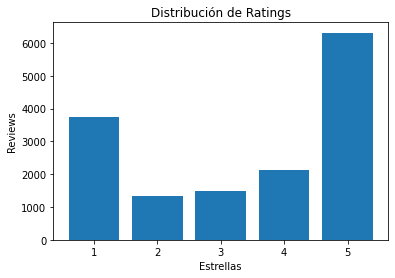

In [6]:
import matplotlib.pyplot as plt

rating_counts = df['overall'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribución de Ratings')
plt.xlabel('Estrellas')
plt.ylabel('Reviews')
plt.show()



¿Qué tan grande son los reviews? (reviewText)

OJO - **MARCA ERROR** - DEBE TENER NaN!!!!!

In [7]:
df['review_length'] = df['reviewText'].apply(len)

plt.hist(df['review_length'], bins=50)
plt.title('Ancho de la columna de reviews')
plt.xlabel('Ancho')
plt.ylabel('Columnas')
plt.show()



TypeError: ignored

Me marca error, debo de tener NaN en algunas filas. Voy a reemplazarlas por ''

In [8]:
df['reviewText'].fillna('', inplace=True)


Vuelvo a intentar graficar los datos --> 

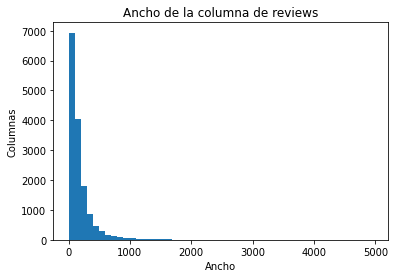

In [9]:
df['review_length'] = df['reviewText'].apply(len)

plt.hist(df['review_length'], bins=50)
plt.title('Ancho de la columna de reviews')
plt.xlabel('Ancho')
plt.ylabel('Columnas')
plt.show()


## Información solicitada en la práctica

1. Cardinalidad del vocabulario

In [10]:
df['reviewText'].head(3)

0    Can only control one of two bulbs from one of ...
1                                          Great skill
2      Not happy. Can not connect to Alexa regardless.
Name: reviewText, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Voy a crear un vector
vector = CountVectorizer()

# Creo una lista con los componentes de las reviews
vector.fit(df['reviewText'].astype(str).tolist())

# Obtengo la relación del vocabulario utilizado (sin repeticiones)
feature_names = vector.vocabulary_.keys()

# Imprimo la cardinalidad del vocabulario y las palabras detectadas
print("Cardinalidaad del vocabulario:", len(feature_names))
print("Vocabulario:", list(feature_names))



Cardinalidaad del vocabulario: 14255
Vocabulario: ['can', 'only', 'control', 'one', 'of', 'two', 'bulbs', 'from', 'echos', 'great', 'skill', 'not', 'happy', 'connect', 'to', 'alexa', 'regardless', 'hue', 'lights', 'linked', 'the', 'lifx', 'in', 'amazon', 'app', 'located', 'smart', 'it', 'should', 'be', 'this', 'hard', 'even', 'watched', 'you', 'tube', 'video', 'and', 'still', 'service', 'works', 'with', 'google', 'home', 'but', 'doesn', 'work', 'getting', 'rid', 'sure', 'machine', 'haven', 'had', 'any', 'issues', 'like', 'other', 'reviews', 'have', 'said', 'do', 'belive', 'about', 'spotty', 'wi', 'fi', 'groupings', 'forces', 'use', 'old', 'invocation', 'phrase', 'tell', 'know', 'what', 'reviewer', 'that', 'is', 'reference', 'new', 'optimized', 'for', 'unfortunately', 'skills', 'will', 'perform', 'account', 'linking', 'currently', 'so', 'we', 'are', 'stuck', 'cumbersome', 'until', 'they', 'get', 'working', 'again', 'just', 'fine', 'though', 'think', 'lot', 'some', 'people', 'due', 'wifi

2. Distribución de reviews por número de estrellas

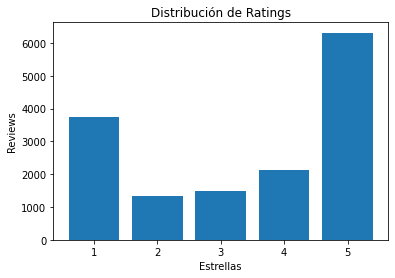

In [12]:
rating_counts = df['overall'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribución de Ratings')
plt.xlabel('Estrellas')
plt.ylabel('Reviews')
plt.show()

plt.show()


3. Número de reviews positivas y negativas (consideraré hasta 3 como negativas y superior a 3 como positivas)

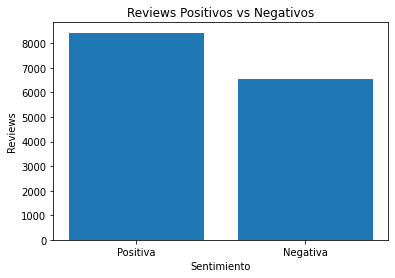

In [13]:
# Limite de calificación positiva y negativa
positive_limit = 4  # Reviews con 4 ó 5 estrellas son positivas
negative_limit = 3  # Reviews hasta 3 estrellas son negativas

# Count the number of positive and negative reviews
positive_count = (df['overall'] >= positive_limit).sum()
negative_count = (df['overall'] <= negative_limit).sum()

# Plot the counts using a bar chart
plt.bar(['Positiva', 'Negativa'], [positive_count, negative_count])

# Add axis labels and a title
plt.xlabel('Sentimiento')
plt.ylabel('Reviews')
plt.title('Reviews Positivos vs Negativos')

plt.show()

4. N-gramas más frecuentes

bigramas -->

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializo CountVectorizer para bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Hago "fit" del texto tokenizado y lo transformo en una matriz de tokens
X = vectorizer.fit_transform(df['reviewText'])

# Extraigo el vocabulario y "vocabulario inverso" de Vectorizer
# El vocabulario inverso es el número que se le asigna al n-grama en el diccionario
vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

# Ahora, obtengo el total de repeticiones de cada bigrama
bi_gram_counts = X.sum(axis=0)

# Ordeno de manera descendiente para los principales 10 bigramas
top_bi_grams = sorted([(count, idx) for idx, count in enumerate(bi_gram_counts.tolist()[0])], reverse=True)[:10]

# Imprimo los principales bigramas y su repeteición
print("Los 10 principales bigramas son:")
for count, idx in top_bi_grams:
    bi_gram = inv_vocab[idx]
    print(bi_gram, count)


Los 10 principales bigramas son:
of the 1292
this app 1117
this is 1090
in the 1085
it is 912
if you 858
the app 854
this skill 830
to be 821
to the 810


In [15]:
# Inicializo CountVectorizer para trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3))

# Hago "fit" del texto tokenizado y lo transformo en una matriz de tokens
X = vectorizer.fit_transform(df['reviewText'])

# Extraigo el vocabulario y "vocabulario inverso" de Vectorizer
# El vocabulario inverso es el número que se le asigna al n-grama en el diccionario
vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

# Ahora, obtengo el total de repeticiones de cada trigrama
tri_gram_counts = X.sum(axis=0)

# Ordeno de manera descendiente para los principales 10 trigramas
top_tri_grams = sorted([(count, idx) for idx, count in enumerate(tri_gram_counts.tolist()[0])], reverse=True)[:10]

# Imprimo los principales trigramas y su repeteición
print("Los 10 principales trigramas son:")
for count, idx in top_tri_grams:
    tri_gram = inv_vocab[idx]
    print(tri_gram, count)

Los 10 principales trigramas son:
be able to 282
it would be 244
you have to 229
does not work 180
to be able 179
easy to use 170
get it to 166
this is great 150
would be nice 147
to set up 147


In [16]:
# Inicializo CountVectorizer para cuatrigramas
vectorizer = CountVectorizer(ngram_range=(4, 4))

# Hago "fit" del texto tokenizado y lo transformo en una matriz de tokens
X = vectorizer.fit_transform(df['reviewText'])

# Extraigo el vocabulario y "vocabulario inverso" de Vectorizer
# El vocabulario inverso es el número que se le asigna al n-grama en el diccionario
vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

# Ahora, obtengo el total de repeticiones de cada cuatrigrama
quad_gram_counts = X.sum(axis=0)

# Ordeno de manera descendiente para los principales 10 cuatrigramas
top_quad_grams = sorted([(count, idx) for idx, count in enumerate(quad_gram_counts.tolist()[0])], reverse=True)[:10]

# Imprimo los principales cuatrigramas y su repeteición
print("Los 10 principales cuatrigramas son:")
for count, idx in top_quad_grams:
    quad_gram = inv_vocab[idx]
    print(quad_gram, count)

Los 10 principales cuatrigramas son:
to be able to 176
get it to work 89
it would be nice 75
easy to set up 71
would be nice if 58
would be nice to 55
if you want to 53
easy to use and 52
to get it to 51
on my kindle fire 48


In [17]:
# Inicializo CountVectorizer para pentagramas
vectorizer = CountVectorizer(ngram_range=(5, 5))

# Hago "fit" del texto tokenizado y lo transformo en una matriz de tokens
X = vectorizer.fit_transform(df['reviewText'])

# Extraigo el vocabulario y "vocabulario inverso" de Vectorizer
# El vocabulario inverso es el número que se le asigna al n-grama en el diccionario
vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

# Ahora, obtengo el total de repeticiones de cada bigrama
penta_gram_counts = X.sum(axis=0)

# Ordeno de manera descendiente para los principales 10 bigramas
top_penta_grams = sorted([(count, idx) for idx, count in enumerate(penta_gram_counts.tolist()[0])], reverse=True)[:10]

# Imprimo los principales bigramas y su repetición
print("Los 10 principales pentagramas son:")
for count, idx in top_penta_grams:
    penta_gram = inv_vocab[idx]
    print(penta_gram, count)

Los 10 principales pentagramas son:
it would be nice if 36
it would be nice to 33
nice to be able to 30
easy to set up and 28
could not get it to 23
ease of use out of 21
to get it to work 20
can get it to work 20
use it all the time 19
like to be able to 19


Es interesante que las principales evaluaciones (Reviews) hablan de posibles mejoras, seguido de características que se valoran de manera preferente. Hay una presencia importante en comentarios sobre la forma de hacer que trabaje. 

¿Cuáles son los pentagramas más frecuentes en los comentarios positivos? ¡Curiosidad únicamente!

In [18]:
vectorizer = CountVectorizer(ngram_range=(5, 5))

df_positive = df[df['overall'] > 3]
df_negative = df[df['overall'] <= 3]
X = vectorizer.fit_transform(df_negative['reviewText'])

vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

penta_gram_neg = X.sum(axis=0)

top_penta_grams_neg = sorted([(count, idx) for idx, count in enumerate(penta_gram_neg.tolist()[0])], reverse=True)[:10]

for count, idx in top_penta_grams_neg:
    penta_gram_neg = inv_vocab[idx]
    print(penta_gram_neg, count)


could not get it to 20
does not work at all 17
can get it to work 17
it would be nice if 16
to get it to work 15
it would be nice to 15
not get it to work 14
ease of use out of 13
would be nice if it 12
there is no way to 12


Como esperaba, la principal razón de una mala calificación es el funcionamiento. También concentra comentarios sobre características que no se cumplen. 

¿Y las positivas? 

In [19]:
vectorizer = CountVectorizer(ngram_range=(5, 5))

df_positive = df[df['overall'] > 3]
df_negative = df[df['overall'] <= 3]
X = vectorizer.fit_transform(df_positive['reviewText'])

vocab = vectorizer.vocabulary_
inv_vocab = {v: k for k, v in vocab.items()}

penta_gram_pos = X.sum(axis=0)

top_penta_grams_pos = sorted([(count, idx) for idx, count in enumerate(penta_gram_pos.tolist()[0])], reverse=True)[:10]

for count, idx in top_penta_grams_pos:
    penta_gram_pos = inv_vocab[idx]
    print(penta_gram_pos, count)

easy to set up and 24
nice to be able to 20
it would be nice if 20
use it all the time 18
it would be nice to 18
keep up the good work 17
very easy to set up 16
this is one of the 15
does exactly what it says 12
haven had to use it 11


Facilidad para operar, armar. También algún comentario de características que se encuentran en falta. 

5. Nubes de palabras

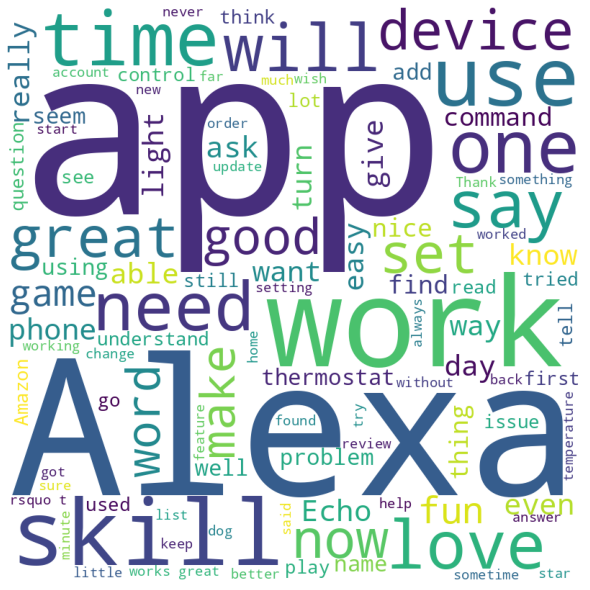

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

max_words = 100

# Concateno todas las reviews en una única string
text = ' '.join(df['reviewText'])

# configuro la word cloud con el número de palabras solicitado
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=max_words).generate(text)

# Genero la wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()


Debería hacer un póster con este wordcloud, jejeje. Me gusta. Parece que el trozo que tomé se centra mucho en productos que incluyen Alexa (la aplicación de lenguaje natural para dispositivos de Amazon). 

6. Visualización en 2 dimensiones de algunos "word embeddings" calculados con Word2Vec (4-5 palabras y pintar las top 10 más similares)

Para visualizar en 2D con Word2Vec voy a aplicar PCA para proyectar "incrustraciones de palabras" de alta dimensionalidad en un plando de 2D. Voy a hacer el ejercicio con las cinco palabras más importantes (por el word cloud debieran ser ¿Alexa, work, skill, app y time?)

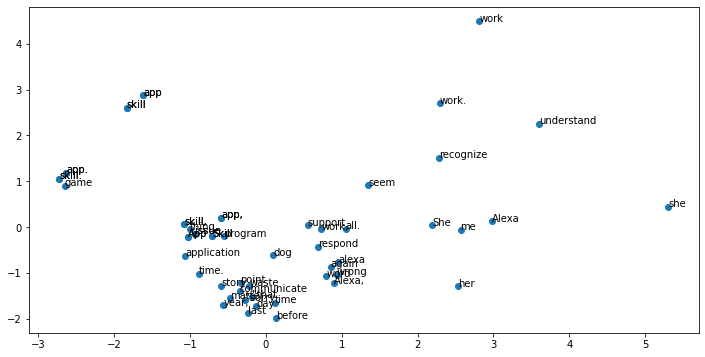

In [21]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Hay que entrenar un modelo Word2Vec model en las evaluaciones (reviews)
sentences = [review.split() for review in df['reviewText']]
model = Word2Vec(sentences, min_count=5, window=5, sg=0)

# Defino las 5 palabras más importantes
important_words = ['Alexa', 'work', 'skill', 'app', 'time']

# Busco las 10 paabras más similares para cada palabra elegida
similar_words = {}
for word in important_words:
    similar_words[word] = [w[0] for w in model.wv.most_similar(word, topn=10)]

# Obtengo las incrustraciones de las palabras más importantes y sus similares
word_embeddings = []
for word in important_words + sum(similar_words.values(), []):
    if word in model.wv.vocab:
        word_embeddings.append(model.wv[word])
word_embeddings = PCA(n_components=2).fit_transform(word_embeddings)

# Voy a generar una gráfica tipo "Scatter"
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(word_embeddings[:, 0], word_embeddings[:, 1])

# Asigno etiquetas a las palabras importantes
for i, word in enumerate(important_words + sum(similar_words.values(), [])):
    if word in model.wv.vocab:
        plt.annotate(word, xy=(word_embeddings[i, 0], word_embeddings[i, 1]))

plt.show()


El objetivo de este análisis es identificar palabras que son similares entre sí y pueden estar relacionadas con algún aspecto de las reseñas de productos (reviews). El algoritmo PCA reduce la dimensionalidad de los vectores de palabras y facilita su visualización. Esto ayuda a identificar estas relaciones. La varianza que captura el algoritmo PCA representa la cantidad de información que explican los componentes principales de la visualización.

Aparentemente, las palabras que representan la mayor varianza en las "reviews" es "she", "understand" y "work". En las que menos varianza ofrecen está "time", "day", "app", "skill". 

## Conclusiones

Los datos parecen estar muy orientados al buen funcionamiento de los productos y a su facilidad de uso ("understand", "ease of", "easy to set up", etc). Incluso, cuando se compara con las evaluaciones, son estos conceptos los que afectan en una mayor manera el resultado. 

Voy a guardar la información en un csv para poder utilizarlo en los siguientes ejercicios --> 

In [22]:
df.to_csv('amazon_reviews_clean.csv', index=False)